In [1]:
import mne
import numpy as np
import os.path as op
import autoreject
import pandas as pd
import openneuro
import matplotlib.pyplot as plt


c:\Users\ZEPHYRUS\Desktop\Imperial\Thesis\individual_project\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = "C:/Users/ZEPHYRUS/Desktop/Imperial/Thesis/individual_project/data/ds002721-master/sub-01/eeg"
pid = '/sub-01_task-run2'
# eeg_file = op.join(dir, 'sub-01_task-run2_eeg.edf')

def read_edf(dname, fname):
  eeg_file = op.join(dname, fname)
  raw = mne.io.read_raw_edf(eeg_file, verbose=True)
  raw.load_data()
  print(raw.info)
  return raw

raw = read_edf(dir, 'sub-01_task-run2_eeg.edf')

# raw.plot(block=True)

ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
ch_types = ['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg']
info = mne.create_info(ch_names=ch_names, sfreq=512, ch_types=ch_types)
raw.info = info
# print(raw.info)
def set_1020_montage(raw):
  montage_kind = 'standard_1020'
  raw.set_montage(montage_kind, match_case=False)
  return raw

raw = set_1020_montage(raw)

Extracting EDF parameters from C:\Users\ZEPHYRUS\Desktop\Imperial\Thesis\individual_project\data\ds002721-master\sub-01\eeg\sub-01_task-run2_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\ZEPHYRUS\AppData\Local\Temp\ipykernel_29484\99112472.py:7: RuntimeWarning: Invalid date encountered (2014-00-00 00:00:00).
  raw = mne.io.read_raw_edf(eeg_file, verbose=True)


Reading 0 ... 573999  =      0.000 ...   573.999 secs...
<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, T3, C3, Cz, C4, T4, T5, P3, Pz, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 1000.0 Hz
>


Using matplotlib as 2D backend.


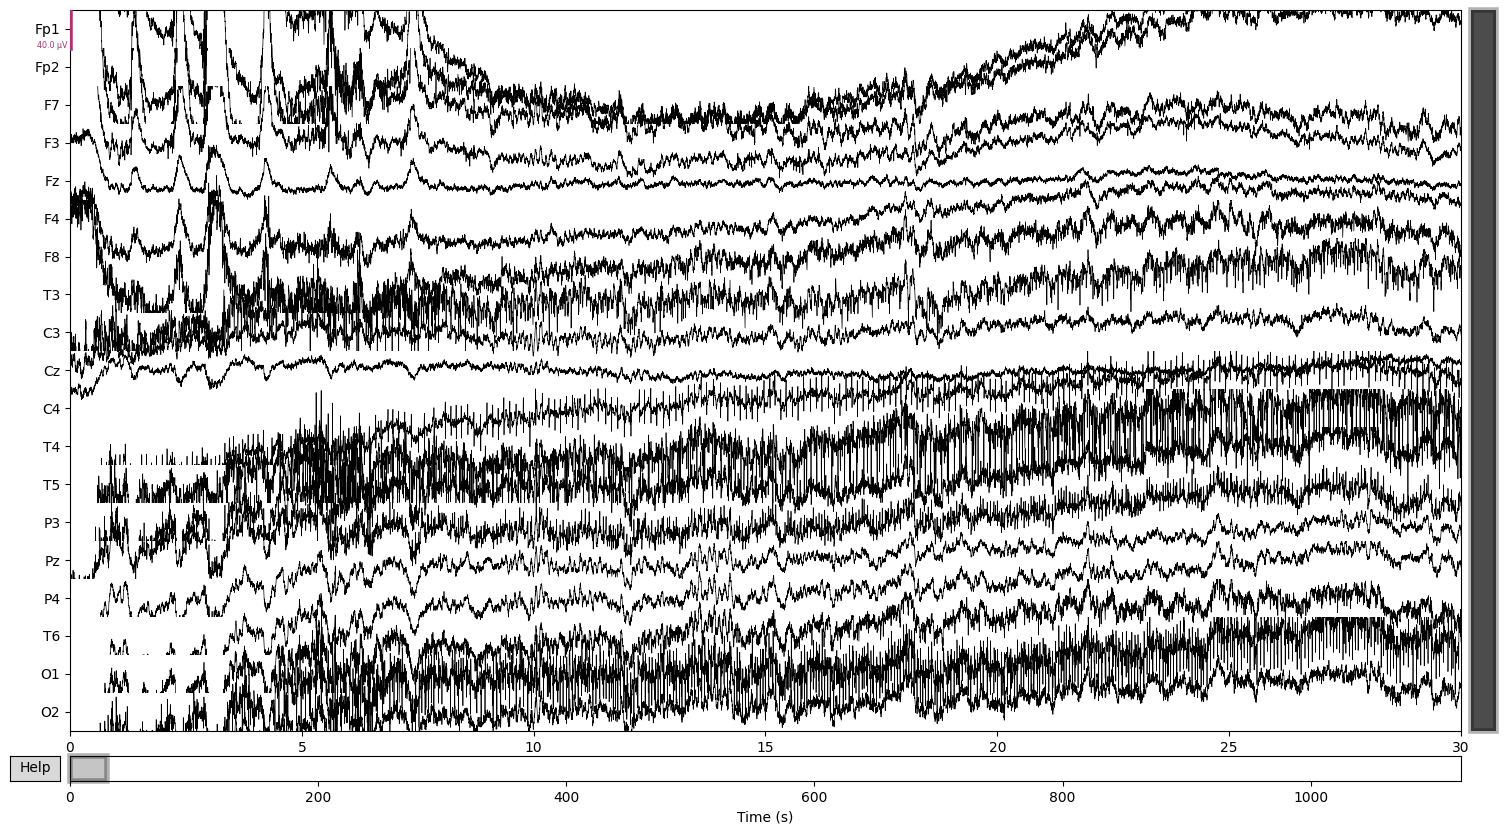

In [3]:
raw_plot = raw.plot(duration=30)

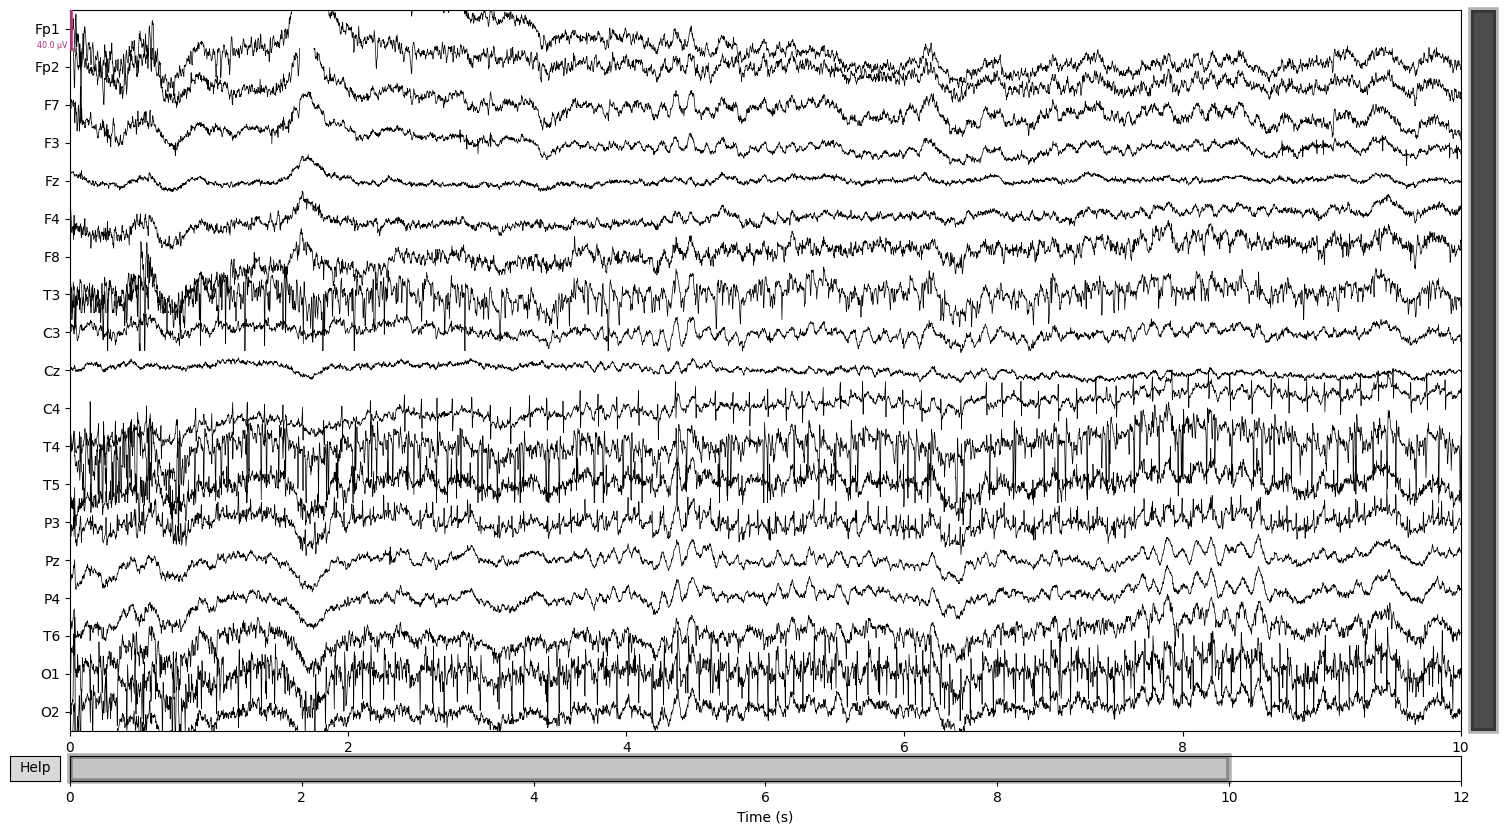

In [4]:
raw = raw.copy().crop(tmin=5.689, tmax=17.689, include_tmax=True)


raw_seg = raw.plot()

In [5]:
raw.filter(l_freq=0.5, h_freq=None)
epochs = mne.make_fixed_length_epochs(raw, duration=1, preload=True)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 sec)

Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 12 events and 512 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Running autoreject on ch_type=eeg


  5%|▌         | Creating augmented epochs : 1/19 [00:00<00:00,   40.94it/s]

100%|██████████| Creating augmented epochs : 19/19 [00:00<00:00,   41.37it/s]
100%|██████████| Computing thresholds ... : 19/19 [00:08<00:00,    2.23it/s]







100%|██████████| Repairing epochs : 12/12 [00:00<00:00,   87.82it/s]











100%|██████████| Repairing epochs : 12/12 [00:00<00:00,   40.75it/s]






















100%|██████████| Fold : 10/10 [00:00<00:00,   25.83it/s]










100%|██████████| Repairing epochs : 12/12 [00:00<00:00,   44.40it/s]






















100%|██████████| Fold : 10/10 [00:00<00:00,   25.05it/s]










100%|██████████| Repairing epochs : 12/12 [00:00<00:00,   51.04it/s]






















100%|██████████| Fold : 10/10 [00:00<00:00,   30.25it/s]










100%|██████████| Repairing epochs : 12/12 [00:00<00:00,   46.23it/s]






















100%|██████████| Fold : 10/10 [00:00<00:00,   31.70it/s]
100%|██████████| n_interp : 4/4 [00:02<00:00,    1.50it/s]






Estimated consensus=0.40 and n_interpolate=1












100%|██████████| Repairing epochs : 12/12 [00:00<00:00,   44.66it/s]

Dropped 2 epochs: 0, 1


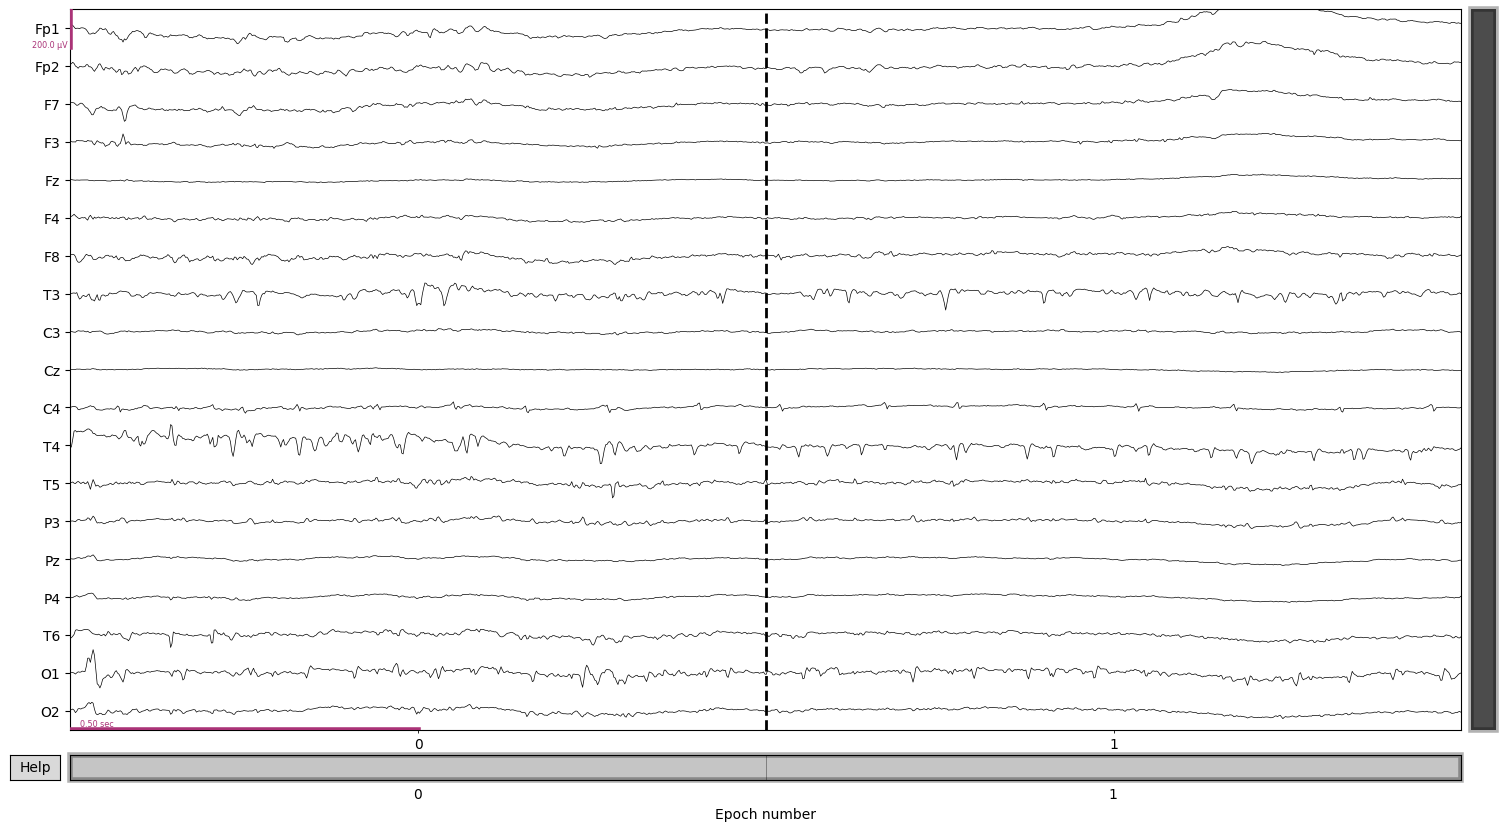

In [6]:
ar = autoreject.AutoReject(n_interpolate=[1,2,3,4], random_state=11, n_jobs=1, verbose=True)
ar.fit(epochs)
epochs_ar, reject_log = ar.transform(epochs, return_log=True)
dropped = epochs[reject_log.bad_epochs].plot(scalings=dict(eeg=100e-6))

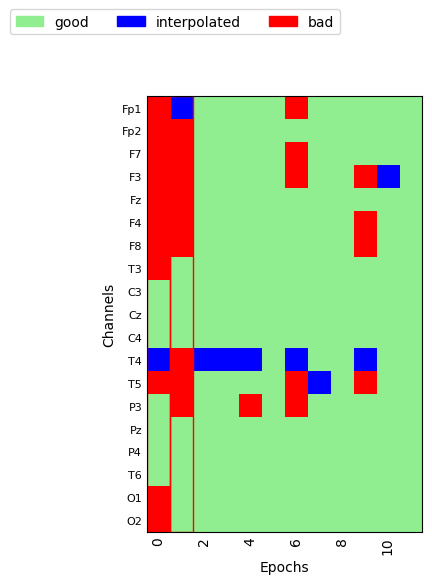

In [7]:
rej = reject_log.plot('horizontal')

In [8]:
# compute ICA
ica = mne.preprocessing.ICA(random_state=99)
ica.fit(epochs[~reject_log.bad_epochs])

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 19 components
Fitting ICA took 9.4s.


c:\Users\ZEPHYRUS\Desktop\Imperial\Thesis\individual_project\venv\lib\site-packages\sklearn\decomposition\_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


<ICA | epochs decomposition, method: fastica (fit in 1000 iterations on 5120 samples), 19 ICA components (19 PCA components available), channel types: eeg, no sources marked for exclusion>

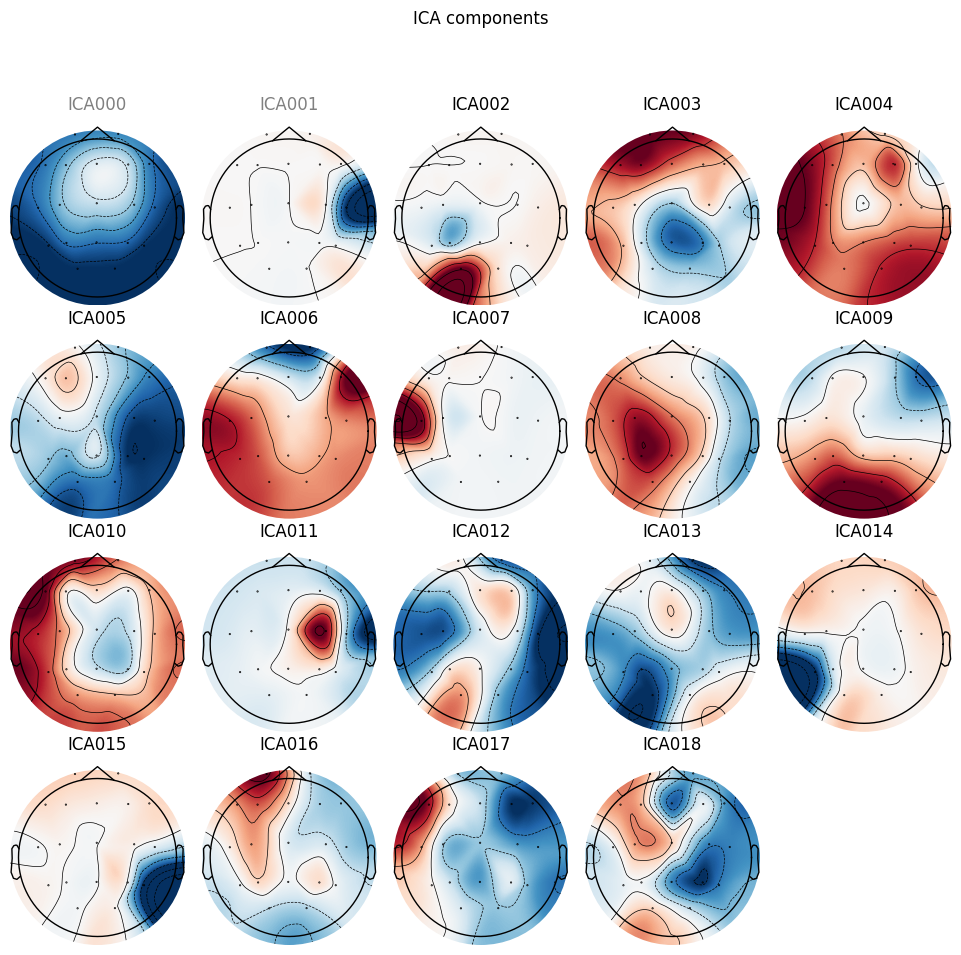

[<MNEFigure size 975x967 with 19 Axes>]

In [13]:

ica.plot_components()


In [ ]:
exclude = [1]
ica.exclude = exclude

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
10 matching events found
No baseline correction applied
0 projection i

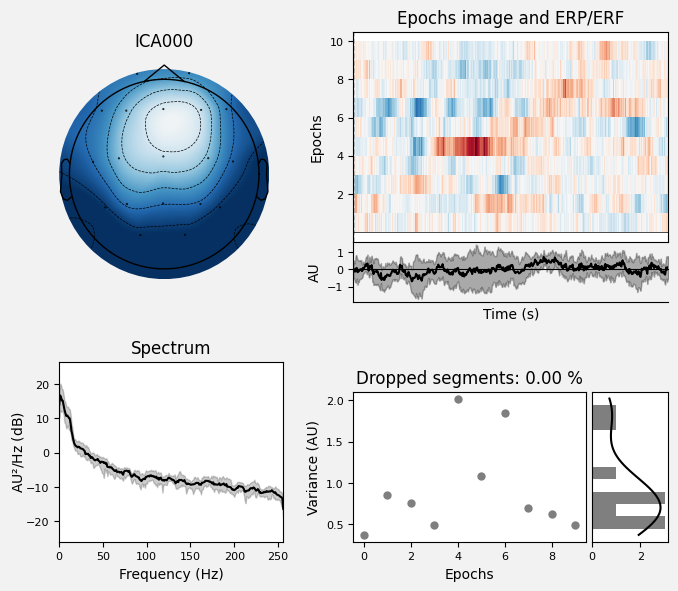

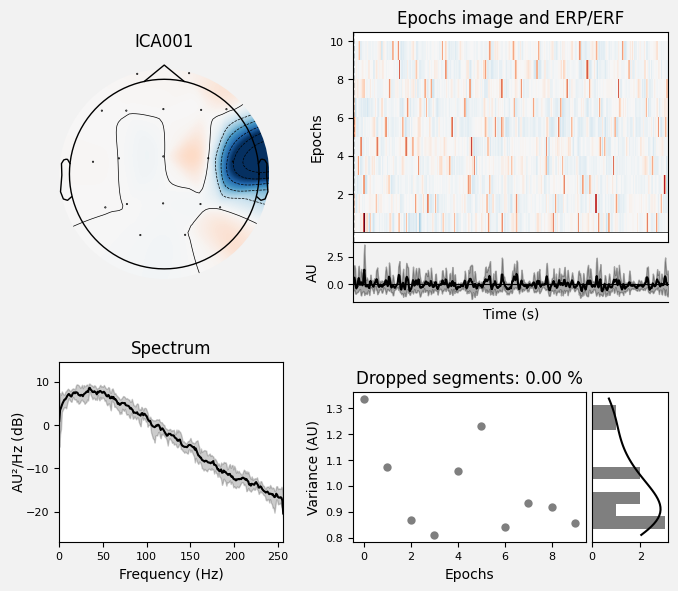

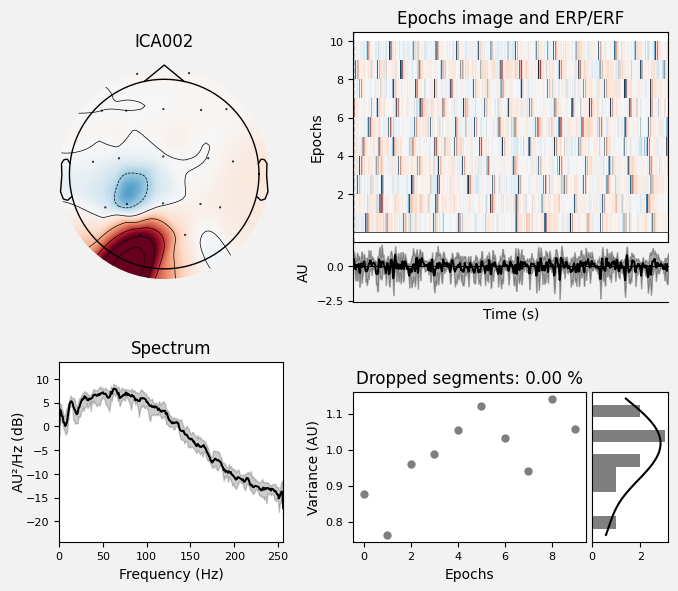

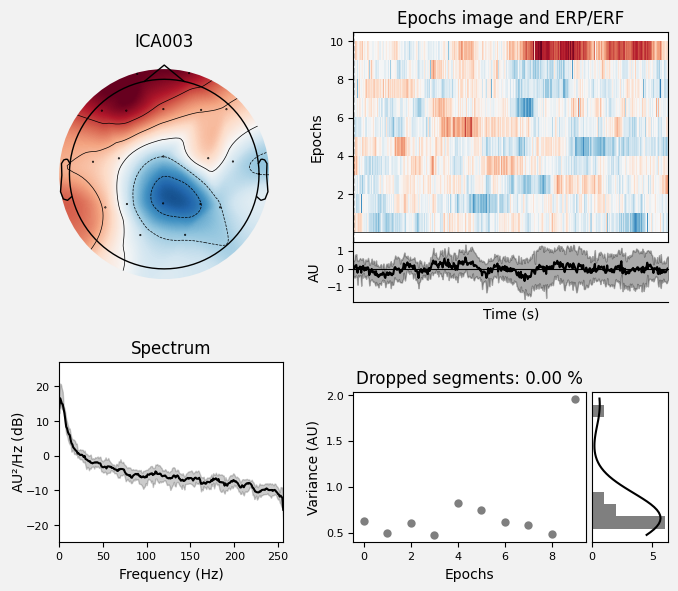

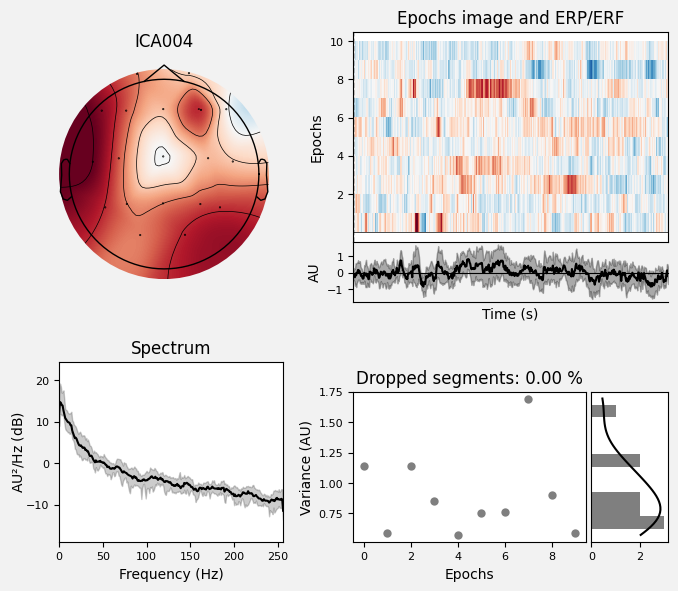

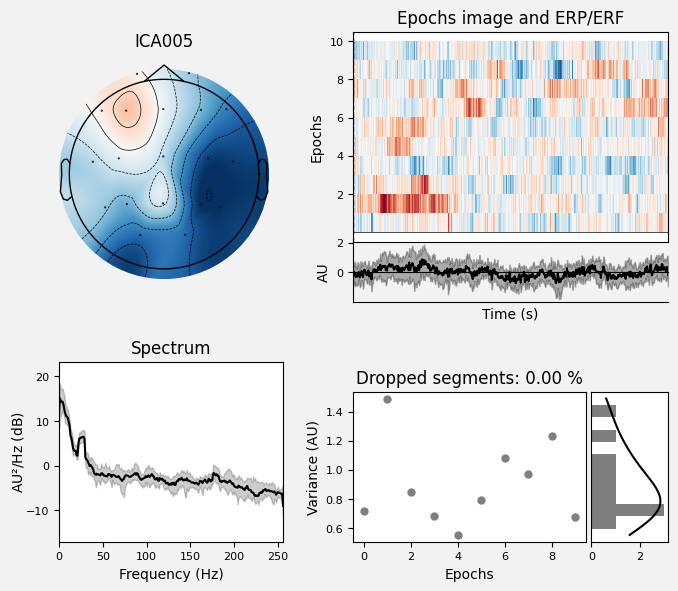

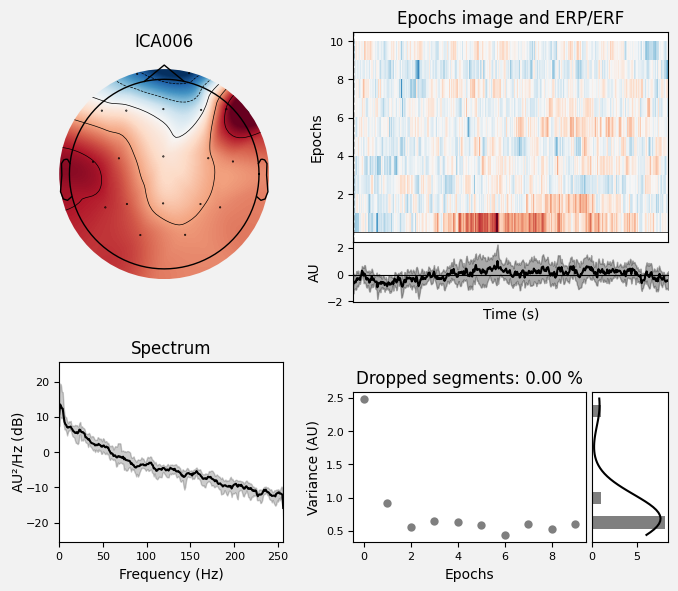

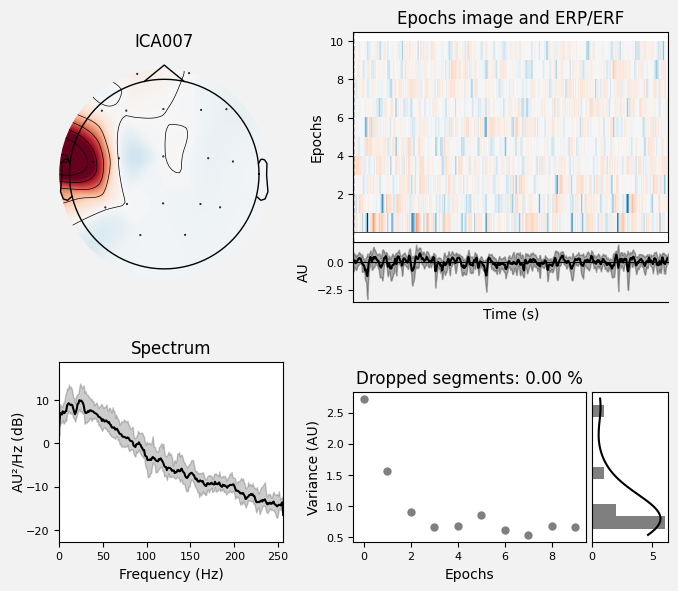

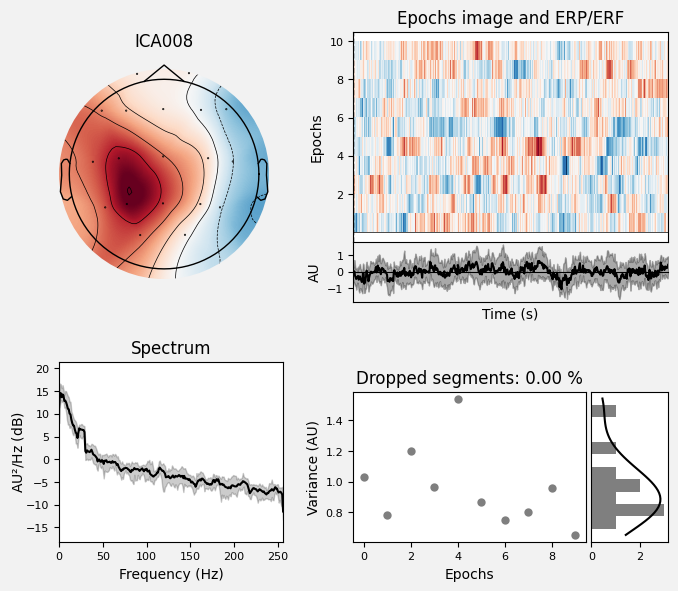

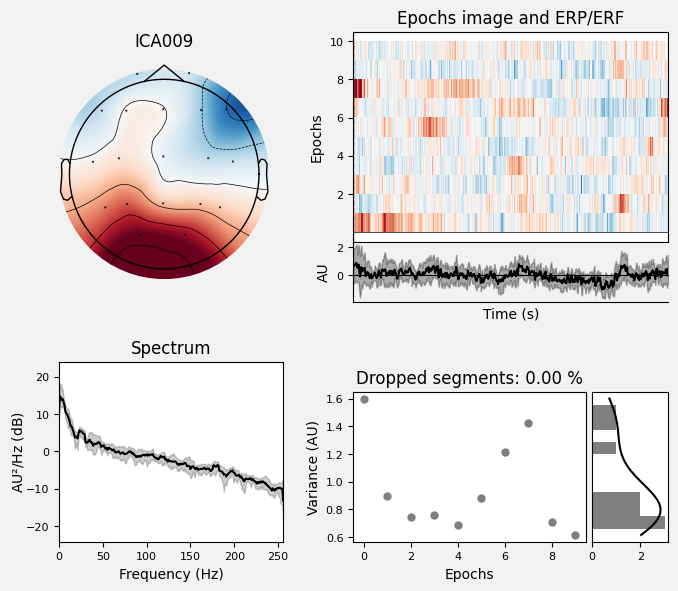

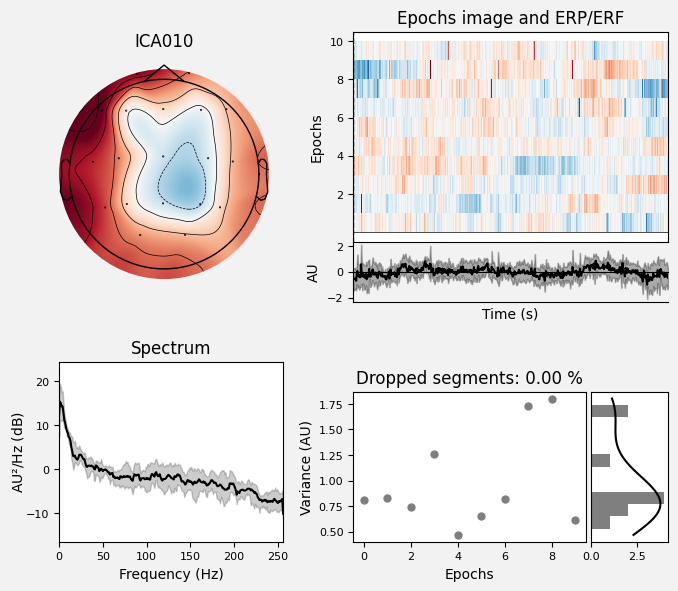

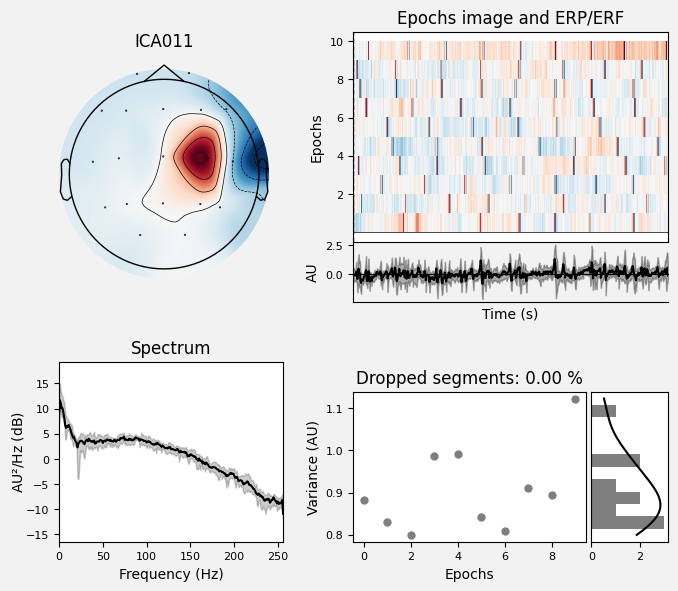

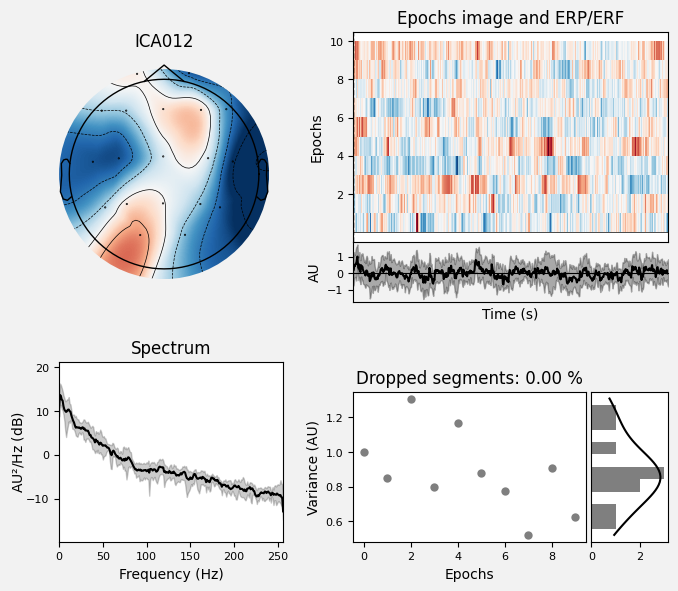

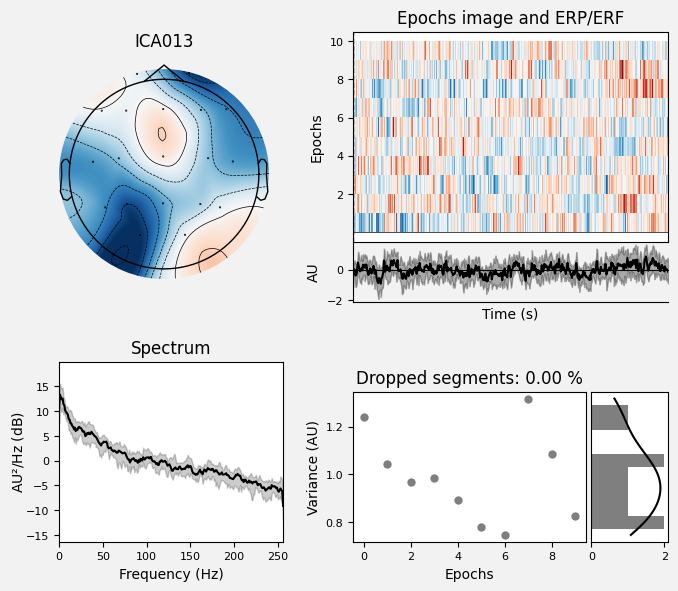

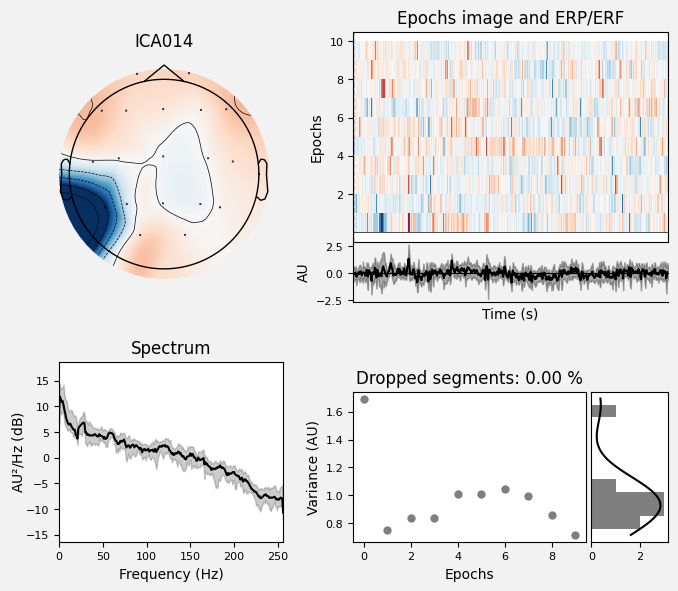

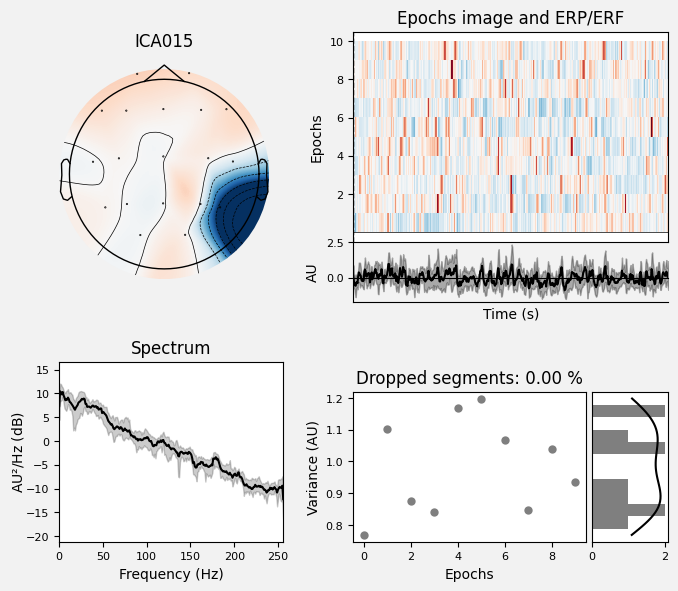

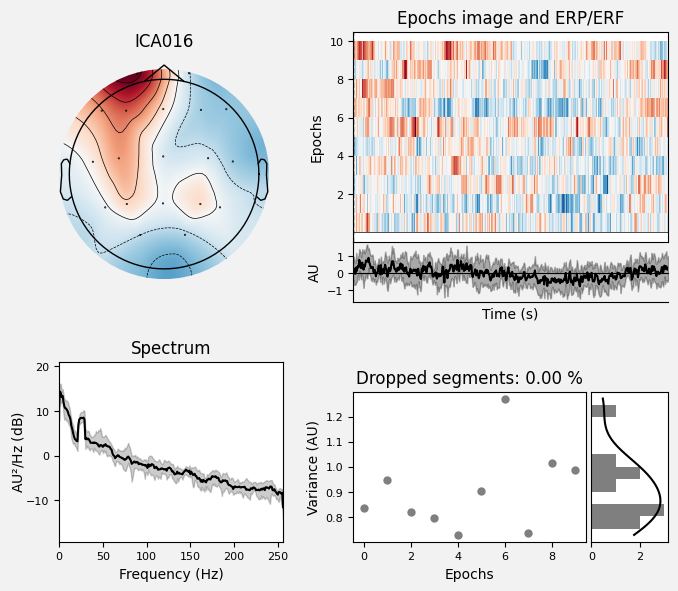

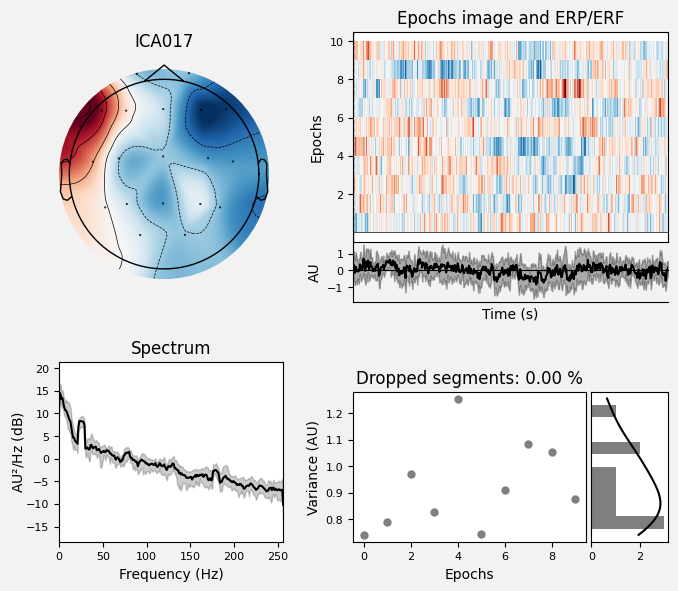

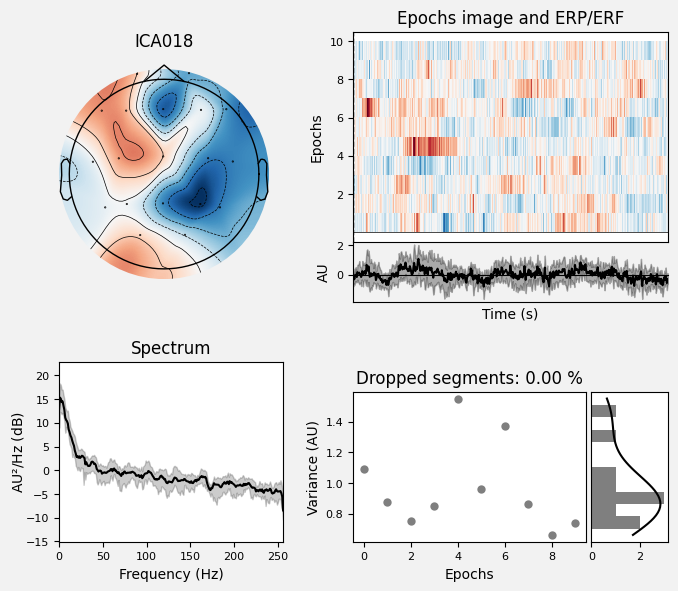

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [10]:
ica.plot_properties(epochs[~reject_log.bad_epochs], picks=range(0, ica.n_components_))

Applying ICA to Evoked instance
    Transforming to ICA space (19 components)
    Zeroing out 2 ICA components
    Projecting back using 19 PCA components


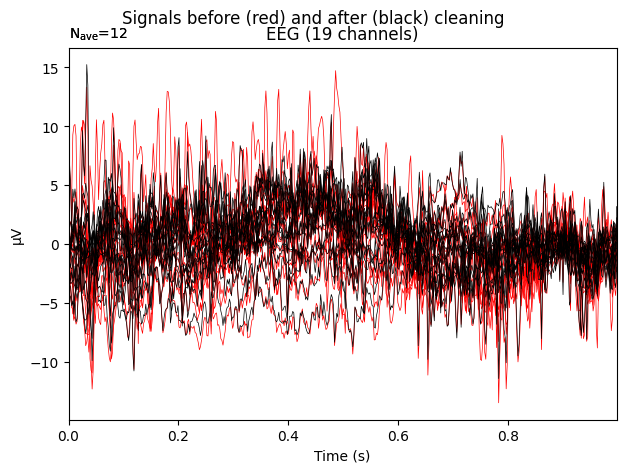

Applying ICA to Epochs instance
    Transforming to ICA space (19 components)
    Zeroing out 2 ICA components
    Projecting back using 19 PCA components


<Epochs |  12 events (all good), 0 - 0.998047 sec, baseline off, ~944 kB, data loaded,
 '1': 12>

In [11]:
ica.plot_overlay(epochs.average(), exclude=ica.exclude)
ica.apply(epochs, exclude=ica.exclude)